# Problem1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
def unit_step_func(x):
    return np.where(x > 0, 1, 0)

In [4]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0, 1, 0)

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

In [5]:
if __name__ == "__main__":

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=1000, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

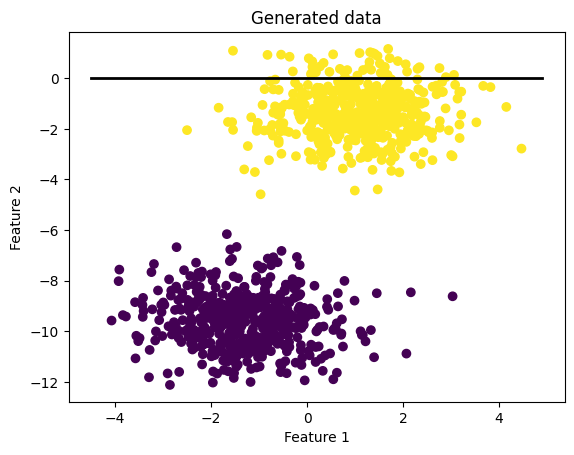

In [6]:
    # Plot the generated data
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Generated data')

    # Add y = 0 line to the plot
    x_min, x_max = plt.xlim()
    plt.plot([x_min, x_max], [0, 0], 'k-', lw=2)

    plt.show()

In [7]:
    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


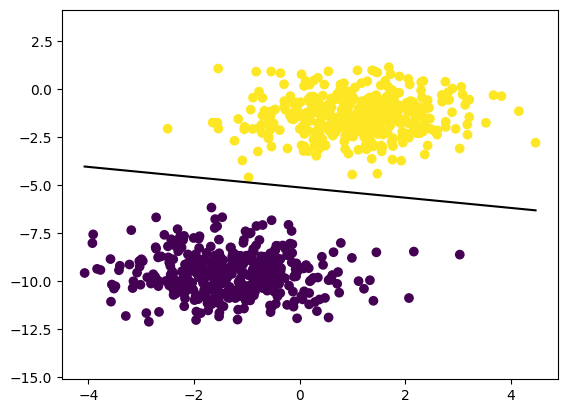

In [8]:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

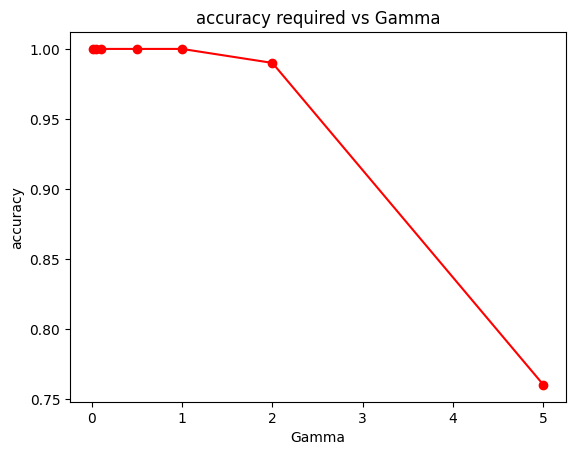

In [10]:
    gammas = [0.01, 0.05, 0.1, 0.5, 1, 2, 5]
    accuracy_list = []
    for gamma in gammas:
        X, y = datasets.make_blobs(
            n_samples=1000, n_features=2, centers=2, cluster_std=gamma, random_state=2
        )
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=123
        )

        p = Perceptron(learning_rate=0.01, n_iters=1000)
        p.fit(X_train, y_train)
        predictions = p.predict(X_test)

        accuracy_list.append(accuracy(y_test, predictions))

    plt.plot(gammas, accuracy_list, "ro-")
    plt.xlabel("Gamma")
    plt.ylabel("accuracy")
    plt.title("accuracy vs Gamma")
    plt.show()

From the above graph we can find that as the gamma increses ,accuracy decreases hence number of iterations decreases

# Problem2

In [9]:
class GradientDescentClassifier:
    def __init__(self, learning_rate=0.1, n_iters=2000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iters):
            linear_output = X.dot(self.weights) + self.bias
            y_pred = self.sigmoid(linear_output)
            error = y_pred - y
            
            grad_weights = X.T.dot(error) / n_samples
            grad_bias = np.sum(error) / n_samples
            
            self.weights -= self.lr * grad_weights
            self.bias -= self.lr * grad_bias
            
            if i % 100 == 0:
                print(f'Iteration: {i}, Loss: {self.loss(y, y_pred)}')
    
    def predict(self, X):
        linear_output = X.dot(self.weights) + self.bias
        y_pred = self.sigmoid(linear_output)
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_cls)

Iteration: 0, Loss: 0.6931471805599452
Iteration: 100, Loss: 0.13890393366090778
Iteration: 200, Loss: 0.09630659462242161
Iteration: 300, Loss: 0.07497717217647541
Iteration: 400, Loss: 0.061506025989054657
Iteration: 500, Loss: 0.05212815297192459
Iteration: 600, Loss: 0.04521769946201509
Iteration: 700, Loss: 0.0399218331471304
Iteration: 800, Loss: 0.0357415246959255
Iteration: 900, Loss: 0.032363330822665695
Perceptron classification accuracy 0.995


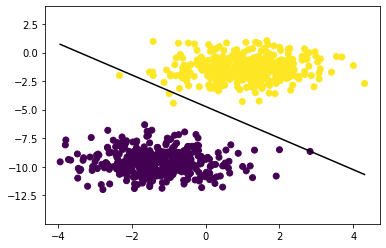

In [10]:
if __name__ == '__main__':
    # testing code here
    X, y = datasets.make_blobs(
        n_samples=1000, n_features=2, centers=2, cluster_std=1.0, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


    gd = GradientDescentClassifier(learning_rate=0.1, n_iters=1000)
    gd.fit(X_train, y_train)
    predictions = gd.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-gd.weights[0] * x0_1 - gd.bias) / gd.weights[1]
    x1_2 = (-gd.weights[0] * x0_2 - gd.bias) / gd.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()



# Problem3

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [14]:
def cross_entropy_loss(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [15]:
class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        
        self.weights1 = np.random.randn(input_dim, hidden_dim)
        self.bias1 = np.zeros((1, hidden_dim))
        self.weights2 = np.random.randn(hidden_dim, output_dim)
        self.bias2 = np.zeros((1, output_dim))
        
    def fit(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.weights1) + self.bias1
            hidden_layer_output = sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights2) + self.bias2
            y_pred = sigmoid(output_layer_input)
            
            # Compute loss
            loss = cross_entropy_loss(y, y_pred).mean()
            
            # Backward pass
            d_output = (y_pred - y) * sigmoid_derivative(y_pred)
            d_weights2 = np.dot(hidden_layer_output.T, d_output)
            d_bias2 = np.sum(d_output, axis=0, keepdims=True)
            d_hidden_layer = np.dot(d_output, self.weights2.T) * sigmoid_derivative(hidden_layer_output)
            d_weights1 = np.dot(X.T, d_hidden_layer)
            d_bias1 = np.sum(d_hidden_layer, axis=0)
            
            # Update weights and biases
            self.weights1 -= self.learning_rate * d_weights1
            self.bias1 -= self.learning_rate * d_bias1
            self.weights2 -= self.learning_rate * d_weights2
            self.bias2 -= self.learning_rate * d_bias2
            
            if epoch % 100 == 0:
                print(f'Epoch {epoch}: Loss {loss}')

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights1) + self.bias1
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights2) + self.bias2
        output = self.sigmoid(output_layer_input)

        return np.round(output)

In [16]:
def generate_data():
    n = 100
    radius1 = 5
    radius2 = 10

    theta = 2 * np.pi * np.random.rand(n)
    r = np.random.rand(n)

    X = np.zeros((n, 2))
    y = np.zeros((n, 1))

    for i in range(n):
        if r[i] < 0.5:
            X[i, 0] = radius1 * np.cos(theta[i])
            X[i, 1] = radius1 * np.sin(theta[i])
            y[i] = 0
        else:
            X[i, 0] = radius2 * np.cos(theta[i])
            X[i, 1] = radius2 * np.sin(theta[i])
            y[i] = 1

    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    y = y.reshape((n,1))

    return X, y

In [17]:
if __name__ == '__main__':
    X, y = generate_data()
    
    model = MLP(input_dim=2, hidden_dim=4, output_dim=1, learning_rate=0.1)
    model.fit(X, y, epochs=1000)

    y_pred = model.predict(X)    
    accuracy = np.mean(y == y_pred)
    print(f'Accuracy: {accuracy}')

Epoch 0: Loss 0.809328003087584
Epoch 100: Loss 0.49320092714916547
Epoch 200: Loss 0.15544272803909898
Epoch 300: Loss 0.09843623822184115
Epoch 400: Loss 0.07585606917767489
Epoch 500: Loss 0.06328187640643614
Epoch 600: Loss 0.055078651711882684
Epoch 700: Loss 0.049214911677867935
Epoch 800: Loss 0.044766490127268674
Epoch 900: Loss 0.04124781886440553
Accuracy: 1.0
